In [3]:
import happybase
import pandas as pd
import plotly.express as px

In [8]:
def read_df(analysis_name, partition_key, table = "project_analysis"):
    """Reads from HBase spark analysis output table"""
    count = 0
    while count<10:
        try:
            con = happybase.Connection("localhost", 9090)
            t = con.table(table)
            break
        except:
            count += 1
            if count == 9:
                print("Connection failure!")
            pass
    
    df = pd.read_json(t.row(str.encode(partition_key))[str.encode(f'df:{analysis_name}')].decode("utf-8"), lines=True)
    return df

## Ustawienie daty

In [45]:
ref_date = '2022-01-16-13'

## Ilość jeżdżących pojazdów


In [16]:
number_vehicles_lines = read_df('number_vehicles_lines',ref_date)

print('Number of Vehicle')
number_vehicles_lines

Number of Vehicle


,count
0,837


## Ilość rekordów per godzina

In [18]:
read_df('number_of_records',ref_date)

,hour,count
0,12,62536


## Ilość działających autobusów per godzina

In [20]:
read_df('number_of_buses_per_hour',ref_date)

,hour,count(VehicleNumber)
0,12,837


## Ilość wpisów autobusów per update pogody

In [21]:
read_df('buses_per_weather_update',ref_date)

,last_updated_epoch,count
0,2022-01-16 11:15:00,16435
1,2022-01-16 11:30:00,19749
2,2022-01-16 11:45:00,26352


## Ilość autobusów per linia (która linia jest najbardziej oblegana przez autobusy)

<AxesSubplot:xlabel='Lines'>

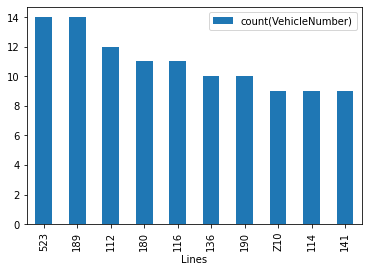

In [27]:
read_df('number_of_buses_per_line',ref_date).head(10).plot(kind="bar", x="Lines")

## Zachowanie autobusu

In [28]:
## Wybierz autobus [7253, 15617, 80635, 7739, 4211]
bus_num = 7253 

In [31]:
bus_data = read_df(f'bus_{bus_num}_route',ref_date)

px.line(bus_data,x='Time',y='speed',title=f"Prędkość autobusu o nr {bus_num}")

In [32]:
fig = px.scatter_mapbox(bus_data, lat="Lat", lon="Lon", color='speed', hover_name="Lines",
                        color_continuous_scale=px.colors.sequential.matter, size_max=20,
                        zoom=5, mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

## Prędkość autobusów 

<AxesSubplot:xlabel='VehicleNumber'>

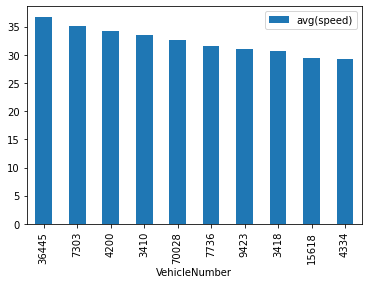

In [34]:
read_df('fastest_buses',ref_date).head(10).plot(kind="bar", x="VehicleNumber")

## Najszybsza linia w mieście

<AxesSubplot:xlabel='Lines'>

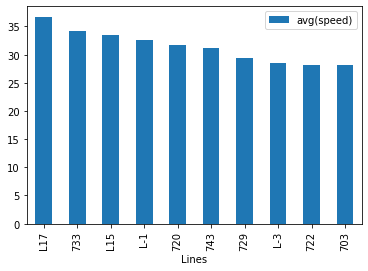

In [36]:
read_df('fastest_lines',ref_date).head(10).plot(kind="bar", x="Lines")

## Opady a srednia predkosc w godzinie

In [37]:
read_df('speed_precip',ref_date)

,hour,avg(speed),avg(precip_mm)
0,12,15.575702,0


## Temperatura a srednia predkosc w godzinie

In [38]:
read_df('speed_precip',ref_date)

,hour,avg(speed),avg(precip_mm)
0,12,15.575702,0


## Heatmapa autobusów overall

In [46]:
data_to_heatmap = read_df('heatmap',ref_date)

fig = px.density_mapbox(data_to_heatmap, lat='agg_Lat', lon='agg_Lon', z='count',
                        mapbox_style="open-street-map", radius=10,animation_frame='key')

fig.show()

KeyError: b'df:heatmap'